#Trần Hoàn Đức Duy - 19521434

#Principal component analysis (PCA) exercise#

##Assignment 1: Implement PCA from scratch##

Please implement PCA algorithm with the following guidelines:
- U_k, X_avg, Z = PCA (X, K), where X is the input data matrix (each column is a sample), K is the number of remained components after removing less important components. For the output, Uk is the matrix made by K basis vectors (u_1, u_2, ..., u_k), Z is the output data after removing redundant components. X_avg is the new origin.
- X_reconstruct = decode (U_k, X_avg, X): restore the data (approximately) from U_k, X_avg, Z matrices.

In [142]:
import numpy as np

def PCA(X, K):                                                                  #K is the number of new components                                                                            

  # Centering the data by subtracting the mean
  X_mean = np.mean(X, axis = 0)
  X_avg = X - X_mean
  # Calculate the covariance matrix                                       
  covariance_matrix = np.cov(X_avg.T)                               #Calculate the covariance matrix

  #TODO: Calculate eigenvalues and eigenvectors
  eigen_values , eigen_vectors = np.linalg.eig(covariance_matrix)

  #TODO: Sort the eigenvalues in descending order
  idx = np.argsort(eigen_values)[::-1]
  sorted_eigenvectors = eigen_vectors[idx]

  #TODO: Select the new basis and transform the data  
  U_k = sorted_eigenvectors[:,:K]
  Z   = np.matmul(X_avg, U_k)
  return U_k, X_mean, Z

In [144]:
def decode_PCA(U_k, X_mean, Z):

  #TODO: decode/restore the data before PCA step
  X_reconstruct = Z.dot(U_k.T) + X_mean
  
  return X_reconstruct

Create dummy dataset and test the code yourself

Note: X and X_reconstruct MUST have the same shape (Please print out)

In [145]:
# TODO: Create dummy dataset and perform testing
X = X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print(f'X:\n{X}')

num_component = 1

U_k, X_mean, Z = PCA(X,num_component)
print(f'U.T.dot(U):\n{U_k.T.dot(U_k)}')
X_reconstruct = decode_PCA(U_k,X_mean,Z)

print(f'X reconstruct:\n{X_reconstruct}')

X:
[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
U.T.dot(U):
[[1.]]
X reconstruct:
[[-1.15997501 -0.75383654]
 [-1.86304424 -1.21074232]
 [-3.02301925 -1.96457886]
 [ 1.15997501  0.75383654]
 [ 1.86304424  1.21074232]
 [ 3.02301925  1.96457886]]


##Assignment 2: PCA for image compression##

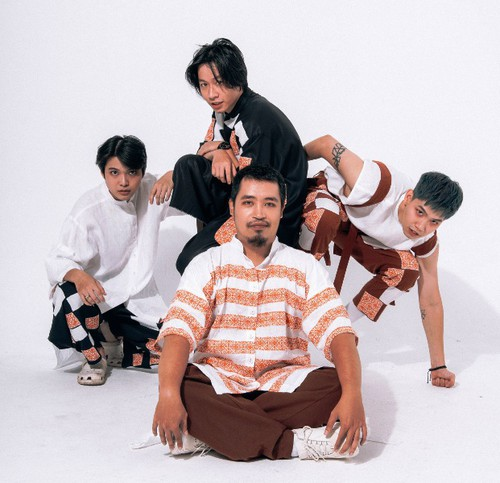

In [148]:
# Download a random online image (RGB) for PCA
# Or you can select your own image (MUST be in RGB format)
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

req = urllib.request.urlopen('https://static.wikia.nocookie.net/producerviet/images/3/3c/Ng%E1%BB%8Dt.jpeg/revision/latest?cb=20210613111653&path-prefix=vi')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
cv2_imshow(img)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


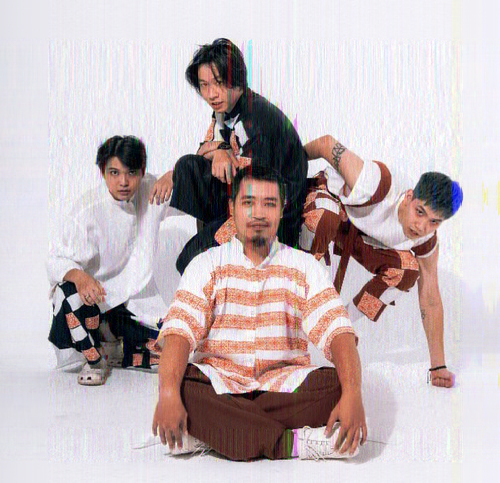

In [149]:
# Compress the image with K = 50
# You can test with other value of K. It is your choice :D
num_component = 200

# Split image channel
blue, green, red = cv2.split(img)

# TODO: Perform image compression using functions given in Assignment 1
U_b, X_b, Z_b = PCA(blue, num_component)
U_r, X_r, Z_r = PCA(red, num_component)
U_g, X_g, Z_g = PCA(green, num_component)

blue_compress = decode_PCA(U_b, X_b, Z_b)
red_compress = decode_PCA(U_r, X_r, Z_r)
green_compress =decode_PCA(U_g, X_g, Z_g)

img_compressed = np.dstack((blue_compress, green_compress, red_compress))

# Show the result image
cv2_imshow(img_compressed)

##Assignment 3: PCA for sound compression##


In [150]:
# Download a random online WAV sound file
# Save the file with name "test.wav"
!wget -O test.wav https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav

--2021-10-13 04:06:36--  https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav
Resolving file-examples-com.github.io (file-examples-com.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to file-examples-com.github.io (file-examples-com.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1073218 (1.0M) [audio/wav]
Saving to: ‘test.wav’

test.wav            100%[===================>]   1.02M  --.-KB/s    in 0.02s   

2021-10-13 04:06:36 (56.0 MB/s) - ‘test.wav’ saved [1073218/1073218]



In [152]:
import numpy as np
from scipy.io.wavfile import read, write

# Read the WAV file
rate, WAV = read("test.wav")

# TODO: Perform sound compression using functions given in Assignment 1
num_component = 2
U_k, X_mean, Z = PCA(WAV, num_component)
WAV_compress  = decode_PCA(U_k,X_mean,Z)

# TODO: Save the compressed sound file with name "result.wav"
# Hint: Using scipy library

write("result.wav",rate,WAV_compress)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


##To do:##
Please write down your comments on PCA for image and sound compression

###Your answer goes here:###

#Submission note:#

*   You must keep the cells' output.
*   You must submit the original image/sound and the compressed image/sound file in the attachment.

